<a href="https://colab.research.google.com/github/EssaAlsharif/Data-Driven-Insights-into-Taekwondo-Player-Behavior/blob/main/Data_Driven_Insights_into_Taekwondo_Player_Behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Data Driven Insights into Taekwondo Player Behavior
In this project, I am exploring Taekwondo players’ behaviour patterns using Machine Learning and feature engineering on Arabic-language data. The goal is to extract actionable insights for the club, while tackling challenges in data preprocessing and analysis.

### **Initialization**

In [674]:
# GitHub
!git clone https://github.com/EssaAlsharif/Data-Driven-Insights-into-Taekwondo-Player-Behavior
%cd Data-Driven-Insights-into-Taekwondo-Player-Behavior
!ls

Cloning into 'Data-Driven-Insights-into-Taekwondo-Player-Behavior'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (37/37), done.
Receiving objects: 100% (38/38), 180.99 KiB | 3.02 MiB/s, done.
remote: Total 38 (delta 18), reused 0 (delta 0), pack-reused 0 (from 0)
Resolving deltas: 100% (18/18), done.
/content/Data-Driven-Insights-into-Taekwondo-Player-Behavior/Data-Driven-Insights-into-Taekwondo-Player-Behavior/Data-Driven-Insights-into-Taekwondo-Player-Behavior/Data-Driven-Insights-into-Taekwondo-Player-Behavior/Data-Driven-Insights-into-Taekwondo-Player-Behavior/Data-Driven-Insights-into-Taekwondo-Player-Behavior/Data-Driven-Insights-into-Taekwondo-Player-Behavior/Data-Driven-Insights-into-Taekwondo-Player-Behavior/Data-Driven-Insights-into-Taekwondo-Player-Behavior/Data-Driven-Insights-into-Taekwondo-Player-Behavior
 Data_Driven_Insights_into_Taekwondo_Player_Behavior.ipynb
 README.md
'Registeration Data.csv

In [675]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
!pip install gdown
import gdown

import sklearn

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, fbeta_score, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.model_selection  import GridSearchCV
from sklearn.metrics import make_scorer


import warnings
warnings.filterwarnings("ignore")

# magic word for producing visualizations in notebook
%matplotlib inline

pd.options.display.max_rows = None
pd.options.display.max_columns = None

### **Loading Data**

In [676]:
# Load data.
data = pd.read_csv("Registeration Data.csv")
print('the shape of the data is:', data.shape)
data.head(25)

the shape of the data is: (194, 12)


,مستمر/ متوقف,اشتراك في,تاريخ ميلاد المشترك,ترتيب المشترك بين الأخوة,الصف,المدرسة,وظيفة ولي الأمر,مكان عمل ولي الأمر,هل مارس المشترك ألعاب قتالية سابقاً؟,حالة المشترك الصحية,هل أجري للمشترك عمليات جراحية؟,المواصلات
0,متوقف,تايكواندو,3-10-2011,الأول,الثامن,عايش السيد,أستاذ,مدرسة صادق نيروخ,لم يمارس,العمر العقلي أقل من أقرانه,لا,نعم
1,متوقف,تايكواندو,30/7/2017,الأول,الثاني,مدرسه الرساله الخاصه,موظف حكومي,المؤتمر الوطني الشعبي للقدس - رام الله,لم يمارس,جيدة,لا,نعم
2,متوقف,تايكواندو,١٤/٦/٢٠١٥,الأول,الثالث,جمعية الشبان المسلمين,محاسب /,محلات أبو عيشة لقطع السيارات الالمانية /شارع ا...,لم يمارس,جيدة,عملية لوز,نعم
3,متوقف,تايكواندو,17/10/2016,الثاني,الثاني,جمعية الشبان المسلمين,محاسب,محلات ابو عيشة لقطع السيارات,لم يمارس,جيدة,لا,نعم
4,متوقف,تايكواندو,٢٥/٦/٢٠١٨,الأول,الأول,جمعية الشبان المسلمين,تاجر ملابس,الخليل,0595422122,0595422123,لا,نعم
5,متوقف,تايكواندو,3/5/2018,الأول,الأول,الرحمة,طبيب عيون,مستشفى سان جون,لم يمارس,جيدة,عملية تنزيل خصية مهاجرة,نعم
6,متوقف,تايكواندو,14/9/2019,الثاني,تمهيدي,روضة المحبة,طبيب عيون,مستشفى سان جون,لم يمارس,جيدة,لا,نعم
7,متوقف,تايكواندو,12/5/2013,الاول,السادس,الحاجه نظيره,تاجر,الخليل,لم يمارس,جيدة,لا,لا
8,متوقف,تايكواندو,15-5-2012,الرابع,السابع,المدرسة الشرعية,تاجر,الخليل,لم يمارس,جيدة,لا,نعم
9,متوقف,تايكواندو,11-11-2015,الأول,الثالث,الانجيليه العربيه,صرافه وحوالات,البلد -دوار الساعه,لم يمارس,جيدة,لا,نعم


In [677]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   مستمر/ متوقف                          191 non-null    object
 1   اشتراك في                             192 non-null    object
 2   تاريخ ميلاد المشترك                   191 non-null    object
 3   ترتيب المشترك بين الأخوة              191 non-null    object
 4   الصف                                  191 non-null    object
 5   المدرسة                               191 non-null    object
 6   وظيفة ولي الأمر                       191 non-null    object
 7   مكان عمل ولي الأمر                    191 non-null    object
 8   هل مارس المشترك ألعاب قتالية سابقاً؟  191 non-null    object
 9   حالة المشترك الصحية                   191 non-null    object
 10  هل أجري للمشترك عمليات جراحية؟        191 non-null    object
 11  المواصلات                       

### **Feature Engineering**

In [678]:
# Renaming Columns from English to Arabic
data = data.rename(columns={
    'مستمر/ متوقف': 'player_status',
    'اشتراك في': 'desired_activity',
    'تاريخ ميلاد المشترك': 'birthday',
    'ترتيب المشترك بين الأخوة': 'family_order',
    'الصف': 'school_grade',
    'المدرسة': 'school',
    'وظيفة ولي الأمر': 'guardian_job',
    'مكان عمل ولي الأمر': 'guardian_job_location',
    'هل مارس المشترك ألعاب قتالية سابقاً؟': 'previous_fighting_experience',
    'حالة المشترك الصحية': 'has_health_condition',
    'هل أجري للمشترك عمليات جراحية؟': 'had_surgery',
    'المواصلات':'needs_transportation',
})

In [679]:
data = data.dropna(subset=['player_status'])

In [680]:
data.head(15)

,player_status,desired_activity,birthday,family_order,school_grade,school,guardian_job,guardian_job_location,previous_fighting_experience,has_health_condition,had_surgery,needs_transportation
0,متوقف,تايكواندو,3-10-2011,الأول,الثامن,عايش السيد,أستاذ,مدرسة صادق نيروخ,لم يمارس,العمر العقلي أقل من أقرانه,لا,نعم
1,متوقف,تايكواندو,30/7/2017,الأول,الثاني,مدرسه الرساله الخاصه,موظف حكومي,المؤتمر الوطني الشعبي للقدس - رام الله,لم يمارس,جيدة,لا,نعم
2,متوقف,تايكواندو,١٤/٦/٢٠١٥,الأول,الثالث,جمعية الشبان المسلمين,محاسب /,محلات أبو عيشة لقطع السيارات الالمانية /شارع ا...,لم يمارس,جيدة,عملية لوز,نعم
3,متوقف,تايكواندو,17/10/2016,الثاني,الثاني,جمعية الشبان المسلمين,محاسب,محلات ابو عيشة لقطع السيارات,لم يمارس,جيدة,لا,نعم
4,متوقف,تايكواندو,٢٥/٦/٢٠١٨,الأول,الأول,جمعية الشبان المسلمين,تاجر ملابس,الخليل,0595422122,0595422123,لا,نعم
5,متوقف,تايكواندو,3/5/2018,الأول,الأول,الرحمة,طبيب عيون,مستشفى سان جون,لم يمارس,جيدة,عملية تنزيل خصية مهاجرة,نعم
6,متوقف,تايكواندو,14/9/2019,الثاني,تمهيدي,روضة المحبة,طبيب عيون,مستشفى سان جون,لم يمارس,جيدة,لا,نعم
7,متوقف,تايكواندو,12/5/2013,الاول,السادس,الحاجه نظيره,تاجر,الخليل,لم يمارس,جيدة,لا,لا
8,متوقف,تايكواندو,15-5-2012,الرابع,السابع,المدرسة الشرعية,تاجر,الخليل,لم يمارس,جيدة,لا,نعم
9,متوقف,تايكواندو,11-11-2015,الأول,الثالث,الانجيليه العربيه,صرافه وحوالات,البلد -دوار الساعه,لم يمارس,جيدة,لا,نعم


In [681]:
data['desired_activity'].value_counts()

,count
desired_activity,
تايكواندو,170
مخيم,11
جمباز,2
ننشاكو,2
كراتيه,2
ما ترونه الأنسب لعمره وشخصيته.بتوقع تايكواندو,1
ضرب البوكس او الملاكمة,1
كرتيه,1
كرتيه,1


In [682]:
# desired_activity: may be  taekwondo, camp, gumbaz, karate, or boxing.
data['desired_activity'] = data['desired_activity'].str.lower().map({
    'تايكواندو': 'taekwondo',
    'مخيم': 'camp',
    'جمباز': 'gumbaz',
    'كراتيه': 'karate',
    'ضرب البوكس او الملاكمة': 'boxing',
    'كرتيه': 'karate',
    'ما ترونه الأنسب لعمره وشخصيته.بتوقع تايكواندو': 'taekwondo',
    'كرتيه': 'karate',
    '.':'taekwondo'
})

In [683]:
data['desired_activity'].value_counts()

,count
desired_activity,
taekwondo,170
camp,11
karate,3
gumbaz,2
boxing,1


In [684]:
# remove all rows other than taekwondo.
data = data[data['desired_activity'] == 'taekwondo']

In [685]:
data['desired_activity'].value_counts()

,count
desired_activity,
taekwondo,170


In [686]:
data['desired_activity'].isna().sum()

np.int64(0)

In [687]:
# remove the column since there is no need to it now.
data = data.drop(columns=['desired_activity'])

In [688]:
data['birthday'].value_counts()

,count
birthday,
٢٥/٦/٢٠١٨,2
19/12/2012,2
9/12/2018,2
16/8/2014,2
٢٩/١٠/٢٠١٦,2
3/5/2018,1
14/9/2019,1
12/5/2013,1
15-5-2012,1


In [689]:
data['player_status'].value_counts()

,count
player_status,
متوقف,111
مستمر,45
نصاب,14


In [690]:
data['player_status'].isna().sum()

np.int64(0)

In [691]:
# player_status: may be  stopped or windler: 0, continuous: 1.
data['player_status'] = data['player_status'].str.lower().map({
    'متوقف': 'stopped',
    'مستمر': 'continuous',
    'نصاب': 'swindler'
})

In [692]:
data['player_status'].value_counts()

,count
player_status,
stopped,111
continuous,45
swindler,14


In [693]:
# player_status: may be  stopped or windler: 1, continuous: 0.
data['player_status'] = data['player_status'].map({
    'stopped': 1,
    'swindler': 1,
    'continuous': 0
})

In [694]:
data['player_status'].value_counts()

,count
player_status,
1,125
0,45


In [695]:
data['family_order'].value_counts()

,count
family_order,
الأول,73
الثاني,34
الثالث,25
الخامس,13
الرابع,13
السادس,5
السادس,2
السابع,2
الاول,1


In [696]:
data['family_order'] = (
    data['family_order']
    .astype(str)
    .str.strip()
)

In [697]:
data['family_order'] = data['family_order'].str.lower().map({
    'الأول': 1,
    'الاول': 1,
    'الثاني': 2,
    'الثالث': 3,
    'الرابع': 4,
    'الخامس': 5,
    'السادس': 6,
    '6': 6,
    'السابع': 7,
    'الثامن': 8
}).astype(int)

In [698]:
data['family_order'].isna().sum()

np.int64(0)

In [699]:
data['family_order'].value_counts()

,count
family_order,
1,74
2,34
3,25
4,13
5,13
6,8
7,2
8,1


In [700]:
data['school_grade'].value_counts()

,count
school_grade,
الأول,36
الثاني,33
الثالث,19
الرابع,17
السادس,13
الثامن,12
السابع,10
الخامس,10
تمهيدي,4


In [701]:
data['school_grade'] = (
    data['school_grade']
    .astype(str)
    .str.strip()
)

In [702]:
# school_grade: from 1-10 are school grades, 11 is high education, and -1 is kindergaten
data['school_grade'] = data['school_grade'].str.lower().map({
    'الأول': 1,
    'الثاني': 2,
    'الثالث': 3,
    'الرابع': 4,
    'الخامس': 5,
    'السادس': 6,
    'السابع': 7,
    'الثامن': 8,
    'التاسع': 9,
    'عاشر': 10,
    'جامعة': 11,
    'تمهيدي': -1,
    'روضة': -1,
    'روضه': -1,
    'مدخلش اشي اسعان': -1,
    'تمهيدي روضة': -1,
    '.': -1
})

In [703]:
data['school_grade'].isna().sum()

np.int64(0)

In [704]:
data['school_grade'].value_counts().sort_index()

,count
school_grade,
-1,17
1,36
2,33
3,19
4,17
5,10
6,13
7,10
8,12


In [705]:
# remove 9,10,11 grades since they have only 1 value.
data = data[~data['school_grade'].isin([9, 10, 11])]

In [706]:
data['school_grade'].value_counts().sort_index()

,count
school_grade,
-1,17
1,36
2,33
3,19
4,17
5,10
6,13
7,10
8,12


In [707]:
# since I have the school_grade, there is no need for the birthday.
data = data.drop(columns=['birthday'])

In [708]:
data['school'].value_counts()

,count
school,
الرحمه,6
عبد الحي شاهين,4
جمعية الشبان المسلمين,4
انس بن مالك,4
رواد المعرفة,3
جمعية الشبان المسلمين,3
نظيرة,3
انصار الابداع,3
ابن العربي,2


In [709]:
def classify_school(name):

    if pd.isna(name):
        return 'other'

    if (
        'الحي' in name or 'السعدية' in name or 'عايش' in name or 'الفاروق' in name or 'علي' in name or
        'الدجاني' in name or 'شاور' in name or 'ابراهيم' in name or 'راضي' in name or 'فهد' in name or
        'الهاجر' in name or 'الغدير' in name or 'غزالة' in name or 'شاهين' in name or 'غازي' in name or
        'الضبعات' in name or 'وداد' in name or 'المحمدية' in name or 'زلوم' in name or 'الدويك' in name or
        'تيسير' in name or 'رشد' in name
    ):
      return 'public'

    return 'private'

In [710]:
data['school'] = data['school'].apply(classify_school)

In [711]:
data['school'].isna().sum()

np.int64(0)

In [712]:
data['school'].value_counts()

,count
school,
private,130
public,37


In [713]:
data['school'] = data['school'].map({
    'private': 1,
    'public': 0
})

In [714]:
data['school'].value_counts()

,count
school,
1,130
0,37


In [715]:
data['guardian_job'].value_counts()

,count
guardian_job,
تاجر,34
عامل,6
موظف,6
تاجر,6
طبيب,5
محاسب,4
مهندس,3
موظف خاص,3
فني اسنان,3


In [716]:
def classify_job(job):

    if pd.isna(job):
        return 'unknown'

    if (
        'موظف' in job or 'عامل' in job or 'مندوب' in job or
        'أستاذ' in job or 'جامعي' in job or 'حكومي' in job or
        'معلم' in job or 'مسؤول ' in job or 'supervisor' in job or
        'جامعة' in job or 'محاسب' in job or 'استاذ' in job or
        'مرشد' in job or 'محاضر' in job or 'طبيب' in job or
        'مهندس' in job or 'اسنان' in job or 'مطعم ' in job or
        'تكنولوجيا' in job or 'شركة' in job or 'صرافة ' in job or
        'مستودع' in job or 'حلواني' in job or 'اختصاص ' in job or
        'مدير' in job or 'حلويات' in job
    ):
        return 'employed'

    if (
        'تاجر' in job or 'تصليح' in job or 'حداد' in job or
        'سائق' in job or 'ميكانيكي' in job or 'اعمال' in job or
        'تمديدات' in job or 'صاحب ' in job or 'تجارة' in job or
        'لحام' in job or 'كهربجي' in job or 'طباخ' in job or
        'حره' in job or 'دهان' in job
    ):
        return 'self_employed'

    return 'unknown'

In [717]:
data['guardian_job'] = data['guardian_job'].apply(classify_job)

In [718]:
data['guardian_job'].isna().sum()

np.int64(0)

In [719]:
data['guardian_job'].value_counts()

,count
guardian_job,
employed,83
self_employed,62
unknown,22


In [720]:
data = pd.get_dummies(data, columns=['guardian_job'], drop_first=True)

In [721]:
data['guardian_job_location'].value_counts()

,count
guardian_job_location,
الخليل,39
الخليل,15
دورا,2
مستشفى عالية الحكومي,2
كهرباء الخليل,2
طلعة ادعيس,2
عين سارة,2
البلد شارع الملك فيصل,2
دورا,2


In [722]:
def classify_job_location(location):

# 1: inside th city (near). 0: outside the city (far). -1: unknown.
    if pd.isna(location):
        return -1

    if (
        'دورا' in location or 'حلحول' in location or 'تفوح' in location or 'الظاهريه' in location or 'السعودية' in location or
         'سعير' in location or 'خرسا' in location or 'امريكا' in location or 'عسقلان' in location or 'رام الله' in location or
         'دوره' in location or 'بيت أمر' in location or 'ترقوميا' in location or 'بيت لحم' in location or 'بيت كاحل' in location or
         'بيت فجار' in location or 'الخط الاخضر' in location or 'عصيون' in location
    ):
        return 0

    return 1

In [723]:
data['guardian_job_location'] = data['guardian_job_location'].apply(classify_job_location)

In [724]:
data['guardian_job_location'].value_counts()

,count
guardian_job_location,
1,145
0,22


In [725]:
data['previous_fighting_experience'].value_counts()

,count
previous_fighting_experience,
لم يمارس,147
كاراتيه,6
كراتيه,2
تايكوندو,2
جمباز مدة سنة,1
0595422122,1
كراتية بجمعية سيدات الخليل انهى الحزام الاصفر,1
كاراتيه ، في المدرسة الكورية الفلسطينية للبنين لمدة سنة ، كيك بوكسنج لمدة نصف سنة في نادي رياضي مقابل الخليل مول,1
كان في النادي عندكم سابقا,1


In [726]:
def classify_previous_experience(answer):
# has experience: 1. Does not have: 0. Unknown: -1
    if pd.isna(answer):
        return -1

    if ('لم يمارس' in answer):
        return 0

    return 1

In [727]:
data['previous_fighting_experience'] = data['previous_fighting_experience'].apply(classify_previous_experience)

In [728]:
data['previous_fighting_experience'].value_counts()

,count
previous_fighting_experience,
0,147
1,20


In [729]:
data['has_health_condition'].value_counts()

,count
has_health_condition,
جيدة,158
لديه مشكله هبوط فالسكر,2
العمر العقلي أقل من أقرانه,1
0595422123,1
ضعف بالنظر,1
إمساك مزمن,1
حساسية في الجهاز التنفسي,1
نقص في الحديد وفيتامين د,1
ممنوع لمس الرأس لمشاكل صحية معينة,1


In [730]:
def classify_helath_case(condition):
# has health conditions: 1. Does not have health conditions: 0. Unknown: -1
    if pd.isna(condition):
        return -1

    if ('جيدة' in condition):
        return 0

    return 1

In [731]:
data['has_health_condition'] = data['has_health_condition'].apply(classify_helath_case)

In [732]:
data['has_health_condition'].value_counts()

,count
has_health_condition,
0,158
1,9


In [733]:
data['had_surgery'].value_counts()

,count
had_surgery,
لا,144
عملية لوز,1
عملية تنزيل خصية مهاجرة,1
عمليه افتاق قبل سنتين,1
عملية فقط لوز وجيوب انفية,1
نعم عملية فتاق,1
عملية فتاق,1
عملية تثبيت خصيه,1
عملية إزالة اللحمية واللوزتين,1


In [734]:
def classify_surgery_history(surgery):
# had surgery: 1. Did not have surgery: 0. Unknown: -1
    if pd.isna(surgery):
        return -1

    if ('لا' in surgery):
        return 0

    return 1

In [735]:
data['had_surgery'] = data['had_surgery'].apply(classify_surgery_history)

In [736]:
data['had_surgery'].value_counts()

,count
had_surgery,
0,145
1,22


In [737]:
data['needs_transportation'].value_counts()

,count
needs_transportation,
نعم,98
لا,65
حسب,1
نصف مواصلة,1
ربما,1
لا,1


In [738]:
def classify_transportaion_need(transport):
# needs transportation: 1. Does not need transportaion: 0.

    if pd.isna(transport):
        return 0

    if ('لا' in transport):
        return 0

    return 1

In [739]:
data['needs_transportation'] = data['needs_transportation'].apply(classify_transportaion_need)

In [740]:
data['needs_transportation'].value_counts()

,count
needs_transportation,
1,101
0,66


In [741]:
data['needs_transportation'].value_counts()

,count
needs_transportation,
1,101
0,66


In [742]:
print('the shape of the data is:', data.shape)
data.head(25)

the shape of the data is: (167, 11)


,player_status,family_order,school_grade,school,guardian_job_location,previous_fighting_experience,has_health_condition,had_surgery,needs_transportation,guardian_job_self_employed,guardian_job_unknown
0,1,1,8,0,1,0,1,0,1,False,False
1,1,1,2,1,0,0,0,0,1,False,False
2,1,1,3,1,1,0,0,1,1,False,False
3,1,2,2,1,1,0,0,0,1,False,False
4,1,1,1,1,1,1,1,0,1,True,False
5,1,1,1,1,1,0,0,1,1,False,False
6,1,2,-1,1,1,0,0,0,1,False,False
7,1,1,6,1,1,0,0,0,0,True,False
8,1,4,7,1,1,0,0,0,1,True,False
9,1,1,3,1,1,0,0,0,1,False,True


### **Modeling**

In [743]:
# Spliting the data into training and testing sets
x = data[['school_grade', 'family_order', 'school',
          'guardian_job_self_employed', 'guardian_job_unknown',
          'guardian_job_location', 'previous_fighting_experience',
          'has_health_condition', 'had_surgery', 'needs_transportation']]

y = data['player_status']

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42,
                                                    stratify = y)

print("Training set has {} samples.".format(x_train.shape[0]))
print("Testing set has {} samples.".format(x_test.shape[0]))

Training set has 133 samples.
Testing set has 34 samples.


#### **Random Forrest Model**

In [744]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

rf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [745]:
y_pred = rf.predict(x_test)

In [746]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6764705882352942

Confusion Matrix:
 [[ 3  6]
 [ 5 20]]

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.33      0.35         9
           1       0.77      0.80      0.78        25

    accuracy                           0.68        34
   macro avg       0.57      0.57      0.57        34
weighted avg       0.66      0.68      0.67        34



In [747]:
y_prob = rf.predict_proba(x_test)[:, 1]

In [748]:
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    cm = confusion_matrix(y_test, y_pred_t)
    recall = recall_score(y_test, y_pred_t)

    print(f"\nThreshold: {t}")
    print("Confusion Matrix:\n", cm)
    print("Recall:", recall)


Threshold: 0.3
Confusion Matrix:
 [[ 2  7]
 [ 2 23]]
Recall: 0.92

Threshold: 0.4
Confusion Matrix:
 [[ 2  7]
 [ 3 22]]
Recall: 0.88

Threshold: 0.5
Confusion Matrix:
 [[ 3  6]
 [ 4 21]]
Recall: 0.84

Threshold: 0.6
Confusion Matrix:
 [[ 3  6]
 [ 6 19]]
Recall: 0.76

Threshold: 0.7
Confusion Matrix:
 [[ 4  5]
 [ 8 17]]
Recall: 0.68


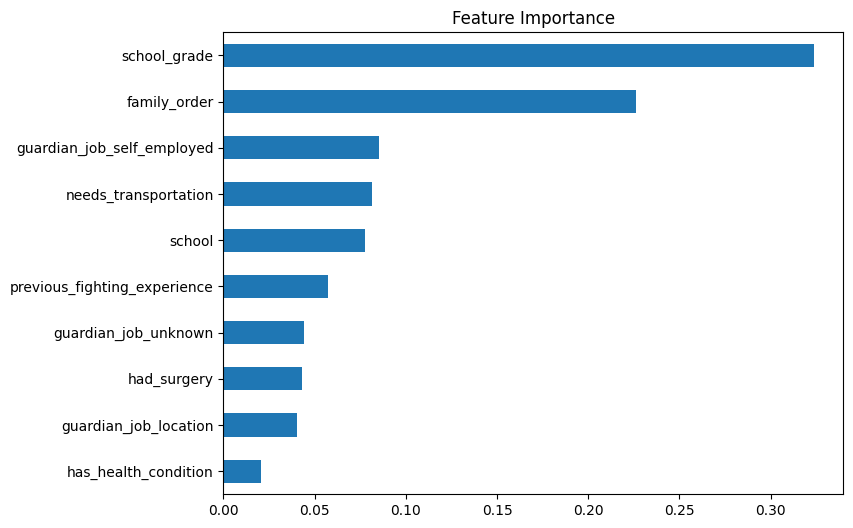

In [749]:
feat_importances = pd.Series(rf.feature_importances_, index=x.columns)
feat_importances.sort_values(ascending=True).plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance")
plt.show()




In [750]:
feat_importances

,0
school_grade,0.323801
family_order,0.226057
school,0.077883
guardian_job_self_employed,0.085399
guardian_job_unknown,0.043954
guardian_job_location,0.040515
previous_fighting_experience,0.057594
has_health_condition,0.020404
had_surgery,0.043058
needs_transportation,0.081333


In [751]:
pd.crosstab(data['school_grade'], data['player_status'], normalize='index')

player_status,0,1
school_grade,,
-1,0.176471,0.823529
1,0.222222,0.777778
2,0.333333,0.666667
3,0.157895,0.842105
4,0.352941,0.647059
5,0.300000,0.700000
6,0.230769,0.769231
7,0.400000,0.600000
8,0.250000,0.750000


In [752]:
churn_rate = pd.crosstab(data['school_grade'], y, normalize='index') [1].sort_values(ascending=False)
churn_rate

,1
school_grade,
3,0.842105
-1,0.823529
1,0.777778
6,0.769231
8,0.750000
5,0.700000
2,0.666667
4,0.647059
7,0.600000


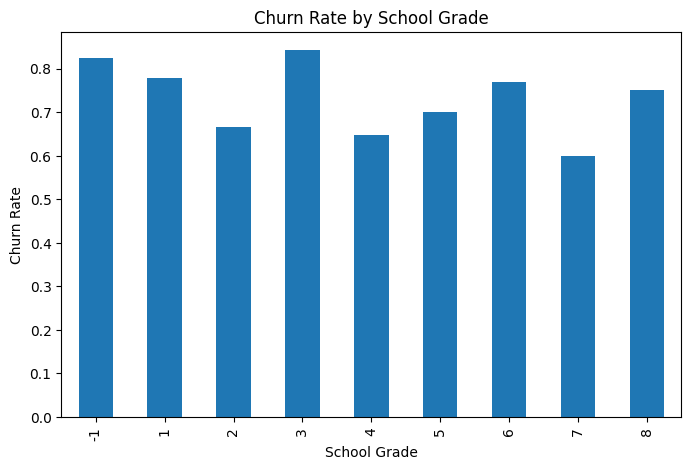

In [753]:
churn_rate.sort_index().plot(kind='bar', figsize=(8,5))
plt.title("Churn Rate by School Grade")
plt.ylabel("Churn Rate")
plt.xlabel("School Grade")
plt.show()

In [754]:
pd.crosstab(data['school_grade'], y)

player_status,0,1
school_grade,,
-1,3,14
1,8,28
2,11,22
3,3,16
4,6,11
5,3,7
6,3,10
7,4,6
8,3,9


#### **Logestic Regression Model**

In [755]:
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [756]:
y_pred = log_reg.predict(x_test)
y_prob = log_reg.predict_proba(x_test)[:,1]

In [757]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 1  8]
 [ 0 25]]
Accuracy: 0.7647058823529411
Precision: 0.7575757575757576
Recall: 1.0
F1 Score: 0.8620689655172413
ROC-AUC: 0.5022222222222222

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.11      0.20         9
           1       0.76      1.00      0.86        25

    accuracy                           0.76        34
   macro avg       0.88      0.56      0.53        34
weighted avg       0.82      0.76      0.69        34



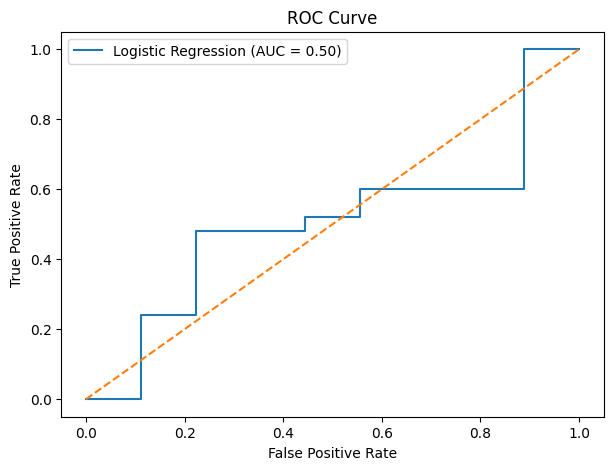

ROC-AUC Score: 0.5022222222222222


In [758]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], linestyle='--')  # random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("ROC-AUC Score:", auc_score)
